In [46]:
import numpy as np # operations on numpy arrays
import pandas as pd # dataframe
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting

In [70]:
# loading the files in the destination folder to build the features of data set 
import os

features = np.empty([1,241])
directory = 'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra NIR from ROI Fuji whole apple/All orientations'
for filename in os.listdir(directory):
    if filename.endswith(".npy"): 
        #print(os.path.join(directory, filename))
      arr = np.load(os.path.join(directory, filename))
      arr_2d = np.reshape(arr, (1, 241))  
      features  = np.append(features, arr_2d, axis=0) 
      print(filename)
    else:
        continue

features = features[1:,:]
features.shape

NIR_FC10_CALYX_02_09_2021_mean.npy
NIR_FC10_SIDE_02_09_2021_mean.npy
NIR_FC10_STEM_02_09_2021_mean.npy
NIR_FC11_CALYX_02_10_2021_mean.npy
NIR_FC11_SIDE_02_10_2021_mean.npy
NIR_FC11_STEM_02_10_2021_mean.npy
NIR_FC12_CALYX_02_10_2021_mean.npy
NIR_FC12_SIDE_02_10_2021_mean.npy
NIR_FC12_STEM_02_10_2021_mean.npy
NIR_FC13_CALYX_02_11_2021_mean.npy
NIR_FC13_SIDE_02_11_2021_mean.npy
NIR_FC13_STEM_02_11_2021_mean.npy
NIR_FC15_CALYX_02_12_2021_mean.npy
NIR_FC15_SIDE_02_12_2021_mean.npy
NIR_FC15_STEM_02_12_2021_mean.npy
NIR_FC17_CALYX_02_16_2021_mean.npy
NIR_FC17_SIDE_02_16_2021_mean.npy
NIR_FC18_CALYX_02_16_2021_mean.npy
NIR_FC18_SIDE_02_16_2021_mean.npy
NIR_FC1_CALYX_02_01_2021_mean.npy
NIR_FC1_SIDE_02_01_2021_mean.npy
NIR_FC1_STEM_02_01_2021_mean.npy
NIR_FC20_CALYX_02_18_2021_mean.npy
NIR_FC4_SIDE_02_04_2021_mean.npy
NIR_FC5_CALYX_02_04_2021_mean.npy
NIR_FC5_SIDE_02_04_2021_mean.npy
NIR_FC5_STEM_02_04_2021_mean.npy
NIR_FC6_CALYX_02_04_2021_mean.npy
NIR_FC6_SIDE_02_04_2021_mean.npy
NIR_FC6_STEM

(84, 241)

In [71]:
# Spectral preprocessing using Savitzky-Golay filter
from scipy.signal import savgol_filter
features = savgol_filter(features, 31, polyorder=2, deriv=1)

In [49]:
# Spectral preprocessing using SNV
def snv(input_data):          # Define a new array and populate it with the corrected data 
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):            # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
    return output_data

features = snv(features)

In [72]:
# Spectral preprocessing using Multiplicative scatter correction
def msc(input_data):
     
     #mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
     #Get the reference spectrum. If not given, estimate it from the mean    
      
        # Calculate mean
    ref = np.mean(input_data, axis=0)
    
 
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
 
    return (data_msc)

features = msc(features)

In [73]:
# Importing the labels of the data set
from numpy import genfromtxt
labels = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra NIR from ROI Fuji whole apple/All orientations/Labels.csv', delimiter=',')
#labels = np.load('C:/Users/nekra/OneDrive/Desktop/PhD UKY/Data analysis/HSI/NIR/Labels.npy') # Control and infested were marked by 0, 1


In [74]:
# convert numpy array to pandas dataframe 
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,0.018972,0.018512,0.018053,0.017593,0.017133,0.016673,0.016213,0.015753,0.015294,0.014834,...,-0.000125,-0.000067,-0.000010,0.000047,0.000104,0.000161,0.000218,0.000275,0.000332,0.000389
1,0.019596,0.019058,0.018520,0.017981,0.017443,0.016905,0.016367,0.015828,0.015290,0.014752,...,-0.000177,-0.000115,-0.000053,0.000009,0.000071,0.000133,0.000195,0.000257,0.000319,0.000381
2,0.018815,0.018358,0.017901,0.017444,0.016987,0.016530,0.016073,0.015617,0.015160,0.014703,...,-0.000174,-0.000103,-0.000032,0.000038,0.000109,0.000180,0.000250,0.000321,0.000392,0.000463
3,0.018576,0.018149,0.017722,0.017295,0.016868,0.016441,0.016014,0.015587,0.015160,0.014733,...,-0.000182,-0.000119,-0.000057,0.000006,0.000068,0.000131,0.000194,0.000256,0.000319,0.000381
4,0.018838,0.018370,0.017901,0.017432,0.016964,0.016495,0.016026,0.015557,0.015089,0.014620,...,-0.000215,-0.000136,-0.000058,0.000021,0.000100,0.000178,0.000257,0.000335,0.000414,0.000493


In [75]:
# load wavelength info. each wavelength respond to 1 band
df_wave = pd.read_csv('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/bands.csv')
df_wave

,Wavelength(nm),Band
0,900.1773,1
1,903.5323,2
2,906.8871,3
3,910.2417,4
4,913.5961,5
...,...,...
236,1686.8290,237
237,1690.1410,238
238,1693.4520,239
239,1696.7630,240


In [76]:
## add label data to the dataframe and rename each column using the corresponding wavelength
df.columns = df_wave['Wavelength(nm)']
df['Label'] = labels
df.head()

Wavelength(nm),900.1773,903.5323,906.8871,910.2417,913.5961,916.9503,920.3044,923.6582,927.0119,930.3654,...,1673.582,1676.894,1680.2060000000001,1683.5179999999998,1686.829,1690.141,1693.4520000000002,1696.763,1700.0739999999998,Label
0,0.018972,0.018512,0.018053,0.017593,0.017133,0.016673,0.016213,0.015753,0.015294,0.014834,...,-0.000067,-0.000010,0.000047,0.000104,0.000161,0.000218,0.000275,0.000332,0.000389,0.0
1,0.019596,0.019058,0.018520,0.017981,0.017443,0.016905,0.016367,0.015828,0.015290,0.014752,...,-0.000115,-0.000053,0.000009,0.000071,0.000133,0.000195,0.000257,0.000319,0.000381,0.0
2,0.018815,0.018358,0.017901,0.017444,0.016987,0.016530,0.016073,0.015617,0.015160,0.014703,...,-0.000103,-0.000032,0.000038,0.000109,0.000180,0.000250,0.000321,0.000392,0.000463,0.0
3,0.018576,0.018149,0.017722,0.017295,0.016868,0.016441,0.016014,0.015587,0.015160,0.014733,...,-0.000119,-0.000057,0.000006,0.000068,0.000131,0.000194,0.000256,0.000319,0.000381,0.0
4,0.018838,0.018370,0.017901,0.017432,0.016964,0.016495,0.016026,0.015557,0.015089,0.014620,...,-0.000136,-0.000058,0.000021,0.000100,0.000178,0.000257,0.000335,0.000414,0.000493,0.0


In [77]:
# dataframe transformation to match the input data format of lineplot function in seaborn 
df_melt = df.melt(id_vars='Label', value_name='Reflectance')
df_melt.head()

,Label,Wavelength(nm),Reflectance
0,0.0,900.177,0.018972
1,0.0,900.177,0.019596
2,0.0,900.177,0.018815
3,0.0,900.177,0.018576
4,0.0,900.177,0.018838


In [80]:
from sklearn.decomposition import PCA # import PCA class from scikit-learn
from sklearn.metrics import classification_report

In [81]:
pca = PCA(n_components=10) # let's only consider the first n PCs
pca_results = pca.fit_transform(features) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

(84, 10)
variance explained by the first two PCs: 75.56%, 18.80%


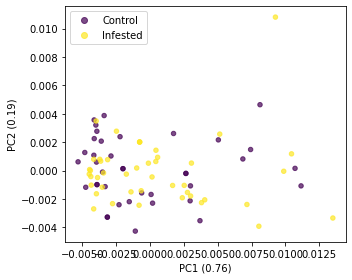

In [82]:
# visualize first two components
fig, ax = plt.subplots(figsize=(5,4))
s1, s2 = pca_results[:, 0], pca_results[:, 1]
scatter = ax.scatter(s1, s2, c=labels, s=20, alpha=0.7)

# create the legend
hs, _ = scatter.legend_elements() # handlers of the legend
ls = ['Control','Infested'] # labels of the legend
ax.legend(hs, ls)

# add labels
ax.set_xlabel('PC1 (%.2f)'%pca_scores[0])
ax.set_ylabel('PC2 (%.2f)'%pca_scores[1])

plt.tight_layout()
#plt.savefig('pca.png', dpi=150)
plt.show()

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold # for five fold cross validation
from sklearn.metrics import confusion_matrix # calcuate confusion matrix
from sklearn.metrics import classification_report

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = LDA() 
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(classification_report(y_test, y_predict, labels=[0, 1]))

overal accuracy: 0.824
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.82      0.90      0.86        10

    accuracy                           0.82        17
   macro avg       0.83      0.81      0.81        17
weighted avg       0.82      0.82      0.82        17

overal accuracy: 0.706
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.78      0.70      0.74        10

    accuracy                           0.71        17
   macro avg       0.70      0.71      0.70        17
weighted avg       0.71      0.71      0.71        17

overal accuracy: 0.529
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.40      0.67      0.50         6

    accuracy                           0.53        17
   macro avg       0.56      0.56      0.53        17
weigh

In [85]:
from sklearn.model_selection import KFold # for five fold cross validation
from sklearn.metrics import confusion_matrix # calcuate confusion matrix

In [86]:
from sklearn import svm

In [87]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = svm.SVC(kernel='poly') # try linear kernel also
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    acc = (y_predict==y_train).sum()/len(y_train)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_train, y_predict, labels=[0,1])
    print(classification_report(y_train, y_predict, labels=[0, 1]))


overal accuracy: 0.701
              precision    recall  f1-score   support

           0       0.93      0.41      0.57        32
           1       0.64      0.97      0.77        35

    accuracy                           0.70        67
   macro avg       0.79      0.69      0.67        67
weighted avg       0.78      0.70      0.67        67

overal accuracy: 0.731
              precision    recall  f1-score   support

           0       0.94      0.47      0.62        32
           1       0.67      0.97      0.79        35

    accuracy                           0.73        67
   macro avg       0.80      0.72      0.71        67
weighted avg       0.80      0.73      0.71        67

overal accuracy: 0.746
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.70      1.00      0.82        39

    accuracy                           0.75        67
   macro avg       0.85      0.70      0.69        67
weigh

In [88]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = KNN(n_neighbors=6) # default is 5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(classification_report(y_test, y_predict, labels=[0, 1]))
    
## plot confusion matrix

overal accuracy: 0.706
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.86      0.60      0.71        10

    accuracy                           0.71        17
   macro avg       0.73      0.73      0.71        17
weighted avg       0.75      0.71      0.71        17

overal accuracy: 0.588
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.71      0.50      0.59        10

    accuracy                           0.59        17
   macro avg       0.61      0.61      0.59        17
weighted avg       0.63      0.59      0.59        17

overal accuracy: 0.529
              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.42      0.83      0.56         6

    accuracy                           0.53        17
   macro avg       0.61      0.60      0.53        17
weigh

In [90]:
from sklearn.ensemble import RandomForestClassifier as RF

In [91]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = RF() # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(classification_report(y_test, y_predict, labels=[0, 1]))

overal accuracy: 0.941
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.91      1.00      0.95        10

    accuracy                           0.94        17
   macro avg       0.95      0.93      0.94        17
weighted avg       0.95      0.94      0.94        17

overal accuracy: 0.647
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.75      0.60      0.67        10

    accuracy                           0.65        17
   macro avg       0.65      0.66      0.65        17
weighted avg       0.67      0.65      0.65        17

overal accuracy: 0.588
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.46      1.00      0.63         6

    accuracy                           0.59        17
   macro avg       0.73      0.68      0.58        17
weigh

In [93]:
## AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = AdaBoostClassifier(n_estimators=1000, learning_rate=.6) # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(classification_report(y_test, y_predict, labels=[0, 1]))
# show the confusion matrix

overal accuracy: 0.882
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.83      1.00      0.91        10

    accuracy                           0.88        17
   macro avg       0.92      0.86      0.87        17
weighted avg       0.90      0.88      0.88        17

overal accuracy: 0.706
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.73      0.80      0.76        10

    accuracy                           0.71        17
   macro avg       0.70      0.69      0.69        17
weighted avg       0.70      0.71      0.70        17

overal accuracy: 0.588
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.46      1.00      0.63         6

    accuracy                           0.59        17
   macro avg       0.73      0.68      0.58        17
weigh

In [94]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score  

In [95]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=123)
# Define the PLS object
pls_binary = PLSRegression(n_components=10)
# Fit the training set
pls_binary.fit(X_train, y_train)
# Predictions: these won't generally be integer numbers
y_pred = pls_binary.predict(X_test)[:,0]
# "Force" binary prediction by thresholding
binary_prediction = (pls_binary.predict(X_test)[:,0] > 0.5).astype('uint8')
print(binary_prediction, y_test)  

[1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1] [1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1.]


In [96]:
def pls_da(X_train,y_train, X_test):            # Define the PLS object for binary classification 
    plsda = PLSRegression(n_components=10)            # Fit the training set
    plsda.fit(X_train, y_train)            # Binary prediction on the test set, done with thresholding
    binary_prediction = (pls_binary.predict(X_test)[:,0] > 0.5).astype('uint8')
    return binary_prediction  

In [97]:
accuracy = []
cval = KFold(n_splits=5, shuffle=True, random_state=123)
for train, test in cval.split(features):
    y_pred = pls_da(features[train,:], labels[train], features[test,:])
    accuracy.append(accuracy_score(labels[test], y_pred))
    print("Average accuracy on 5 splits: ", np.array(accuracy).mean())  

Average accuracy on 5 splits:  0.8823529411764706
Average accuracy on 5 splits:  0.8823529411764706
Average accuracy on 5 splits:  0.8627450980392156
Average accuracy on 5 splits:  0.8676470588235293
Average accuracy on 5 splits:  0.8816176470588235


In [98]:
# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    plsda = PLSRegression(n_components=10) 
    plsda.fit(X_train, y_train)
    y_predict = plsda.predict(X_train)
    binary_prediction = (plsda.predict(X_test)[:,0] > 0.5).astype('uint8')
    acc = (binary_prediction==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, binary_prediction, labels=[0,1])
    print(classification_report(y_test, binary_prediction, labels=[0, 1]))
# show the confusion matrix

overal accuracy: 0.824
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.82      0.90      0.86        10

    accuracy                           0.82        17
   macro avg       0.83      0.81      0.81        17
weighted avg       0.82      0.82      0.82        17

overal accuracy: 0.824
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.82      0.90      0.86        10

    accuracy                           0.82        17
   macro avg       0.83      0.81      0.81        17
weighted avg       0.82      0.82      0.82        17

overal accuracy: 0.706
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.56      0.83      0.67         6

    accuracy                           0.71        17
   macro avg       0.72      0.73      0.70        17
weigh

In [99]:
# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    plsda = PLSRegression(n_components=10) 
    plsda.fit(X_train, y_train)
    y_predict = plsda.predict(X_train)
    binary_prediction = (plsda.predict(X_train)[:,0] > 0.5).astype('uint8')
    acc = (binary_prediction==y_train).sum()/len(y_train)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_train, binary_prediction, labels=[0,1])
    print(classification_report(y_train, binary_prediction, labels=[0, 1]))
# show the confusion matrix

overal accuracy: 0.881
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.86      0.91      0.89        35

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67

overal accuracy: 0.910
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.87      0.97      0.92        35

    accuracy                           0.91        67
   macro avg       0.92      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67

overal accuracy: 0.910
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.90      0.95      0.92        39

    accuracy                           0.91        67
   macro avg       0.91      0.90      0.91        67
weigh